In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/customer_churn.csv')
df.head()

,CustomerId,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15802351,Beers,755,Germany,Female,33,6,90560.30,2,1,1,42607.69,0
1,15591091,Goering,644,France,Male,44,5,73348.56,1,1,0,157166.79,1
2,15769582,Kang,586,France,Male,29,3,0.00,2,1,1,142238.54,0
3,15651823,Nkemjika,590,France,Female,60,6,147751.75,1,1,0,88206.04,1
4,15740175,Raynor,732,Germany,Female,42,2,118889.66,2,0,0,87422.15,0


In [2]:
## drop ID and lastname
df.drop(columns = ['CustomerId', 'Lastname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,755,Germany,Female,33,6,90560.30,2,1,1,42607.69,0
1,644,France,Male,44,5,73348.56,1,1,0,157166.79,1
2,586,France,Male,29,3,0.00,2,1,1,142238.54,0
3,590,France,Female,60,6,147751.75,1,1,0,88206.04,1
4,732,Germany,Female,42,2,118889.66,2,0,0,87422.15,0


In [3]:
## check for missing
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [4]:
## Dummy-encoding All categorical variables
## no need to loop
## no need to write the variable names
df = pd.get_dummies(df, drop_first = True) # must be selected for LINEAR MODELS (reference level is created)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_Germany,Geography_Spain,Gender_Male
0,755,33,6,90560.30,2,1,1,42607.69,0,True,False,False
1,644,44,5,73348.56,1,1,0,157166.79,1,False,False,True
2,586,29,3,0.00,2,1,1,142238.54,0,False,False,True
3,590,60,6,147751.75,1,1,0,88206.04,1,False,False,False
4,732,42,2,118889.66,2,0,0,87422.15,0,True,False,False


In [5]:
## X and y
X = df.drop(columns = 'Churned')
y = df['Churned']

In [6]:
## SPLIT 80% train 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 591)

In [8]:
## is training set balanced?
## imbalanced data set
## if imbalanced is too bad (say < 0.05 then you might need to correct)
## 20% churned (there is no need )
y_train.value_counts() / len(y_train)

,count
Churned,
0,0.800309
1,0.199691


In [9]:
## Classifier
from sklearn.tree import DecisionTreeClassifier

## instance
## NO STOPPING RULES (just stops when impurity cannot be decreased anymore)
model = DecisionTreeClassifier()

## fit on the training or the fixed (imbalance) dataset
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.654296351568298, 0.9821428571428571, 'Age <= 42.5\ngini = 0.32\nsamples = 6480\nvalue = [5186, 1294]'),
 Text(0.4815177876587367, 0.9464285714285714, 'NumOfProducts <= 2.5\ngini = 0.2\nsamples = 4616\nvalue = [4097, 519]'),
 Text(0.5679070696135173, 0.9642857142857142, 'True  '),
 Text(0.3733596455739259, 0.9107142857142857, 'NumOfProducts <= 1.5\ngini = 0.177\nsamples = 4517\nvalue = [4073, 444]'),
 Text(0.24663683052280036, 0.875, 'Geography_Germany <= 0.5\ngini = 0.267\nsamples = 2220\nvalue = [1867.0, 353.0]'),
 Text(0.14012186134245896, 0.8392857142857143, 'Balance <= 74197.941\ngini = 0.217\nsamples = 1678\nvalue = [1470, 208]'),
 Text(0.03562685536406366, 0.8035714285714286, 'Age <= 30.5\ngini = 0.357\nsamples = 481\nvalue = [369, 112]'),
 Text(0.00857590500535994, 0.7678571428571429, 'Age <= 18.5\ngini = 0.167\nsamples = 109\nvalue = [99, 10]'),
 Text(0.0072565350045353345, 0.7321428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.009895275006184546, 0.732

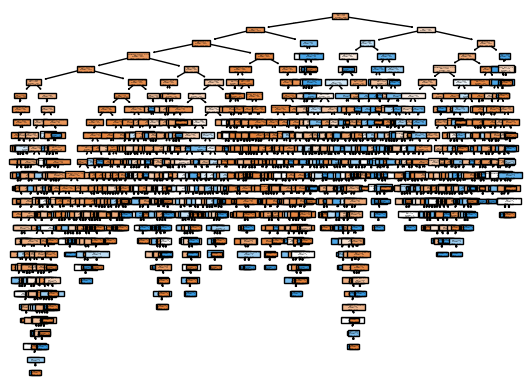

In [10]:
## plot diagram
from sklearn.tree import plot_tree

plot_tree(model, feature_names = X_train.columns, filled = True)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting
    the model as we need to find the predicted value for every point in
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator

    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4,cmap=plt.cm.Greys)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

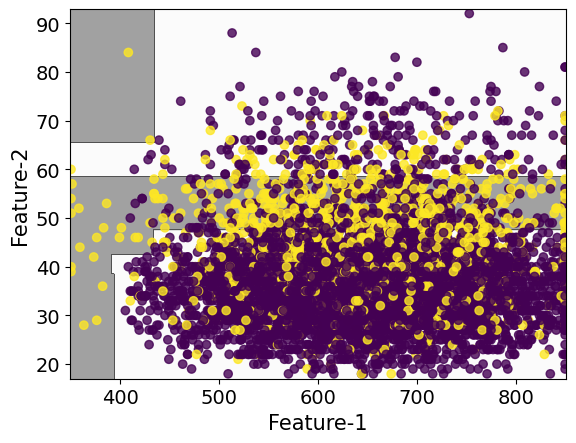

In [16]:
## plot the decision boundary of the classifier
plot_decision_boundaries(X_train, y_train, DecisionTreeClassifier, max_depth = 4);

In [17]:
## fit a tree with a max_depth = 1

## instance
dt = DecisionTreeClassifier(max_depth = 1)

## fit
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

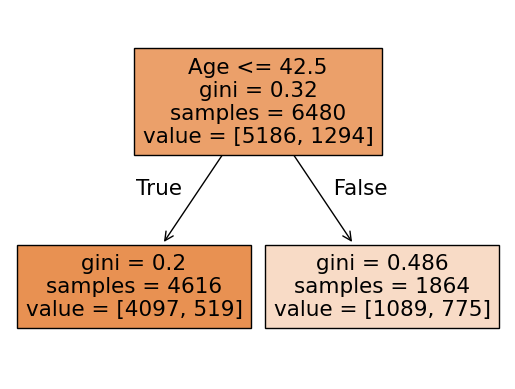

In [19]:
plot_tree(dt, feature_names=X_train.columns, filled=True);

In [20]:
## calculate GINI INDEX of the ROOT NODE

## p1 proportion of non-churns on the training set
p1 = 1294 / (1294 + 5186)
p2 = 5186 / (1294 + 5186)
2*p1*p2

0.3196294391098917

In [21]:
## FOR BINARY
## The maximum GINI INDEX is 0.5
## this the maximum impurity

In [22]:
## Gini Index = 1 - (p1**2 + p2**2 + p3**2)
n = 12
p1 = 4 / n
p2 = 4 / n
p3 = 4 / n

## Gini
1 - (p1**2 + p2**2 + p3**2)

0.6666666666666667

In [ ]:
## the maximum GINI depends on the number of classes to predict

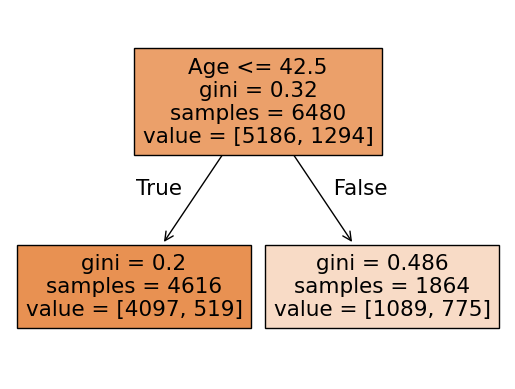

In [23]:
plot_tree(dt, feature_names=X_train.columns, filled=True);

In [24]:
## What is the COMBINED GINI OF THE SPLIT?

## parent node
## GINI = 0.32 ---- 6480

## children nodes
## left node GINI = 0.2  --- 4616
## right node GINI = 0.486   ----- 1864

## Combined GINI
(4616/6480)*0.2 + (1864/6480)*0.486

0.28226913580246915

In [25]:
## What is the IMPURITY DECREASE (Improvement) of the split?
## parent gini = 0.32
## combined children gini = 0.2823

0.32 -  0.2823

0.03770000000000001